Connected to myenv (Python 3.12.8)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [6]:
# Create folder for images
os.makedirs("figures", exist_ok=True)

data_path = "../data/processed/"
idle = pd.read_csv(f"{data_path}idle30_clean.csv")

In [7]:
# ============================================
# Drive Dataset Correlation Heatmap
# ============================================
# Check all columns
print(idle.columns.tolist())

features = idle.columns.tolist()
print("Features for correlation heatmap:", features)

print("\n" + "="*50)
print("CORRELATION WITH FEATURES")
print("="*50)
corr = idle[features].corr()
print(corr)

['engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load', 'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1', 'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e', 'commanded_throttle_actuator', 'fuel_air_commanded_equiv_ratio', 'absolute_barometric_pressure', 'relative_throttle_position', 'intake_air_temp', 'timing_advance', 'catalyst_temperature_bank1_sensor1', 'catalyst_temperature_bank1_sensor2', 'control_module_voltage', 'commanded_evaporative_purge', 'time_run_with_mil_on', 'time_since_trouble_codes_cleared', 'distance_traveled_with_mil_on', 'warm_ups_since_codes_cleared']
Features for correlation heatmap: ['engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load', 'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1', 'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e', 'commanded_throttle_actuator', 'fuel_air_command

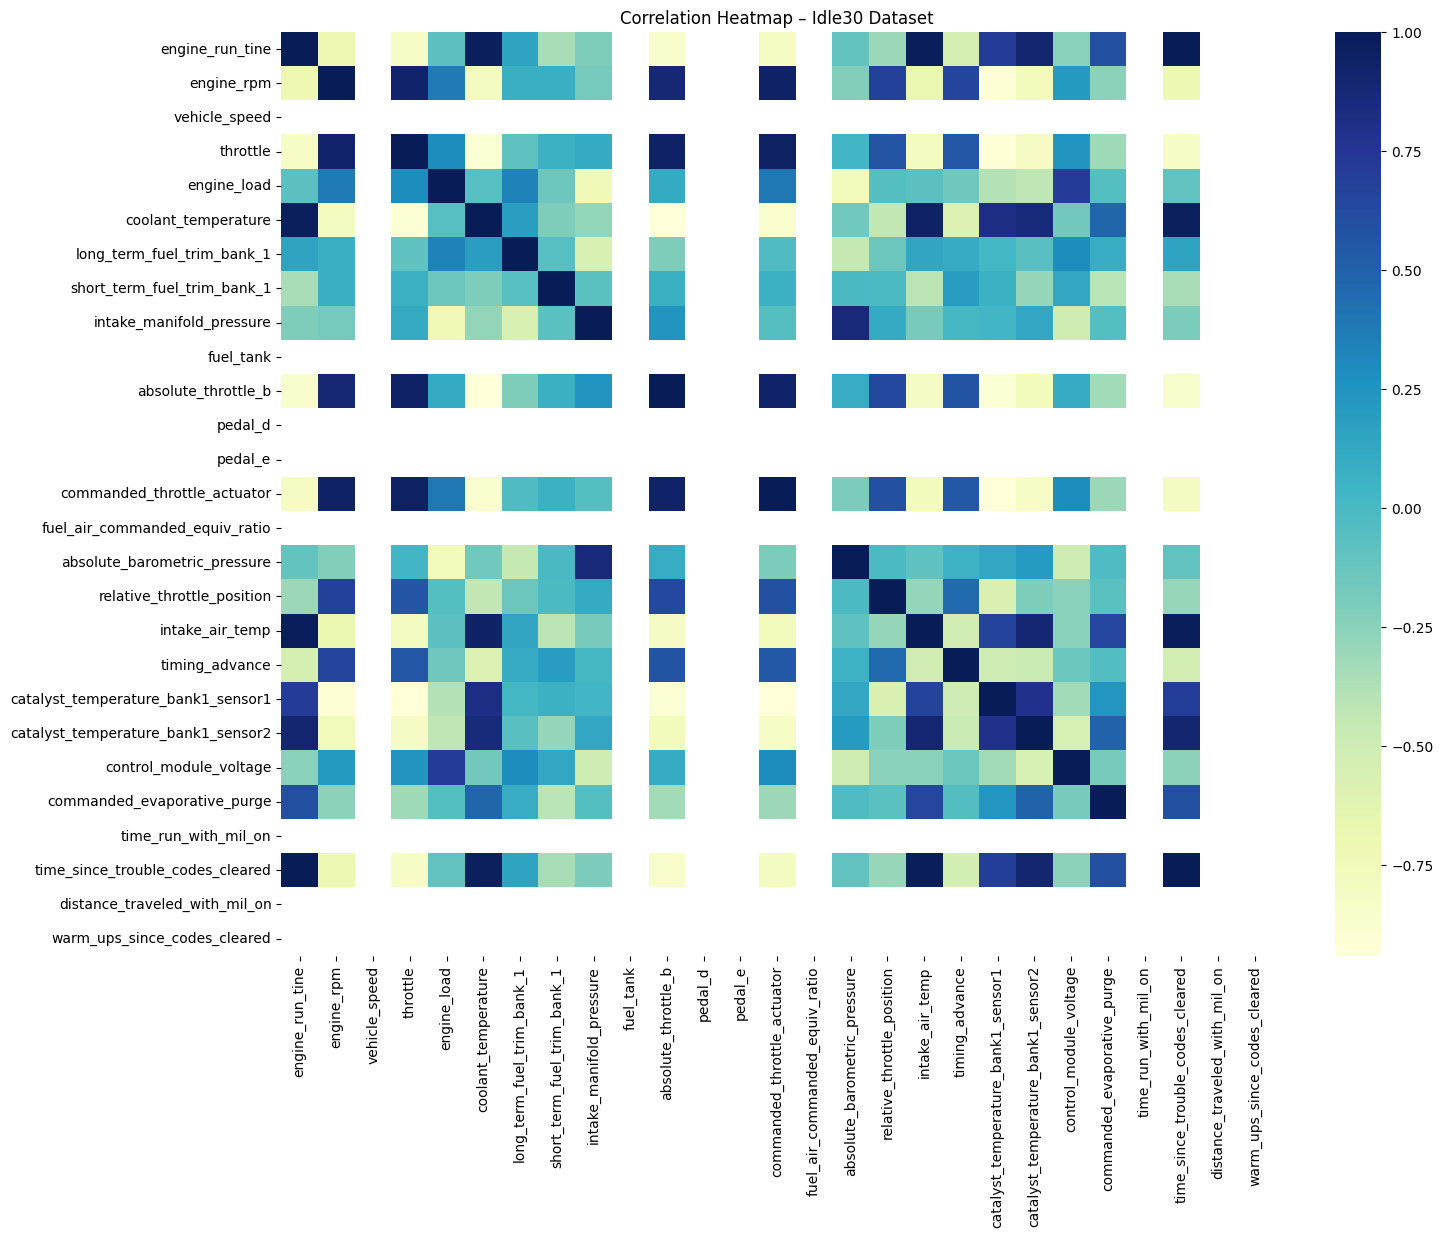

In [8]:
# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(idle[features].corr(), cmap='YlGnBu')
plt.title("Correlation Heatmap – Idle30 Dataset")
plt.savefig("figures/idle30_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
print("\nNaN values per column in correlation matrix:")
print(corr[features].isna().sum())

columns_to_drop_idle = [
    'vehicle_speed',
    'fuel_tank',
    'pedal_d',
    'pedal_e',
    'fuel_air_commanded_equiv_ratio',
    'time_run_with_mil_on',
    'distance_traveled_with_mil_on',
    'warm_ups_since_codes_cleared'
]


NaN values per column in correlation matrix:
engine_run_tine                        8
engine_rpm                             8
vehicle_speed                         27
throttle                               8
engine_load                            8
coolant_temperature                    8
long_term_fuel_trim_bank_1             8
short_term_fuel_trim_bank_1            8
intake_manifold_pressure               8
fuel_tank                             27
absolute_throttle_b                    8
pedal_d                               27
pedal_e                               27
commanded_throttle_actuator            8
fuel_air_commanded_equiv_ratio        27
absolute_barometric_pressure           8
relative_throttle_position             8
intake_air_temp                        8
timing_advance                         8
catalyst_temperature_bank1_sensor1     8
catalyst_temperature_bank1_sensor2     8
control_module_voltage                 8
commanded_evaporative_purge            8
time_run_wi

In [10]:
# Remove them from feature list
features_clean_idle = [f for f in features if f not in columns_to_drop_idle]

# Recompute correlation
corr_idle_clean = idle[features_clean_idle].corr()

print("\nCleaned correlation matrix for idle:")
print(corr_idle_clean)


Cleaned correlation matrix for idle:
                                    engine_run_tine  engine_rpm  throttle  \
engine_run_tine                            1.000000   -0.709479 -0.825925   
engine_rpm                                -0.709479    1.000000  0.917700   
throttle                                  -0.825925    0.917700  1.000000   
engine_load                               -0.079663    0.383140  0.294213   
coolant_temperature                        0.969946   -0.790792 -0.902273   
long_term_fuel_trim_bank_1                 0.149402    0.077694 -0.089135   
short_term_fuel_trim_bank_1               -0.353191    0.079851  0.063886   
intake_manifold_pressure                  -0.208656   -0.170395  0.106513   
absolute_throttle_b                       -0.852710    0.879080  0.945272   
commanded_throttle_actuator               -0.798473    0.941249  0.947510   
absolute_barometric_pressure              -0.106728   -0.224211  0.022543   
relative_throttle_position            

In [11]:
##not necessary the copy but keeping for consistency
corr_matrix_idle = corr_idle_clean.copy()

upper_tri_idle = corr_matrix_idle.where(
    np.triu(np.ones(corr_matrix_idle.shape), k=1).astype(bool)
)

strongest_pos_idle = upper_tri_idle.stack().sort_values(ascending=False)
print("\n" + "="*50)
print("Strongest positive correlations (IDLE):")
print("="*50)
print(strongest_pos_idle.head(10))

strongest_neg_idle = upper_tri_idle.stack().sort_values(ascending=True)
print("\n" + "="*50)
print("Strongest negative correlations (IDLE):")
print("="*50)
print(strongest_neg_idle.head(10))


Strongest positive correlations (IDLE):
engine_run_tine      time_since_trouble_codes_cleared    0.995622
                     intake_air_temp                     0.992152
intake_air_temp      time_since_trouble_codes_cleared    0.986637
engine_run_tine      coolant_temperature                 0.969946
coolant_temperature  time_since_trouble_codes_cleared    0.962670
throttle             commanded_throttle_actuator         0.947510
                     absolute_throttle_b                 0.945272
coolant_temperature  intake_air_temp                     0.942348
engine_rpm           commanded_throttle_actuator         0.941249
absolute_throttle_b  commanded_throttle_actuator         0.929258
dtype: float64

Strongest negative correlations (IDLE):
coolant_temperature          absolute_throttle_b                  -0.940726
commanded_throttle_actuator  catalyst_temperature_bank1_sensor1   -0.926724
throttle                     catalyst_temperature_bank1_sensor1   -0.925293
engine_rpm     

In [12]:
# ===========================================
# Scatter plots for strongest correlations
# ===========================================

os.makedirs("figures/idle30_scatter/positive", exist_ok=True)
os.makedirs("figures/idle30_scatter/negative", exist_ok=True)


Creating scatter plots for top 5 positive correlations...


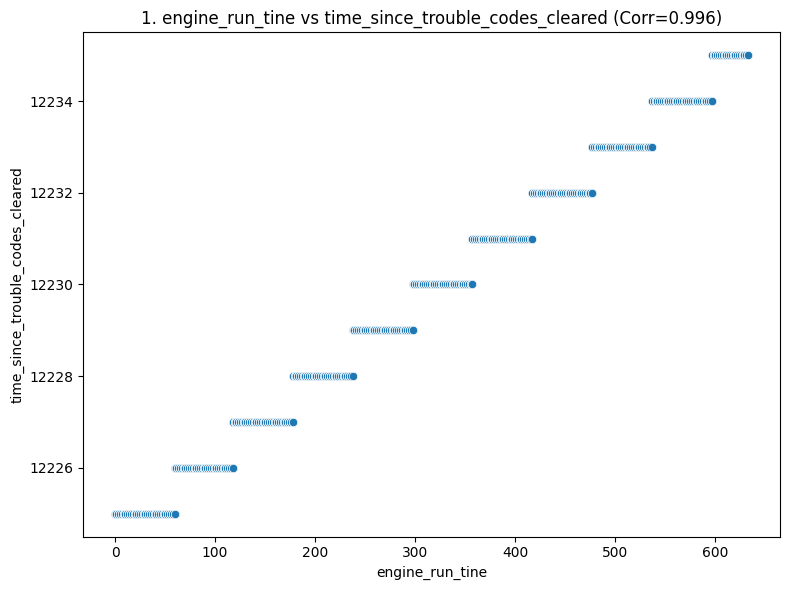

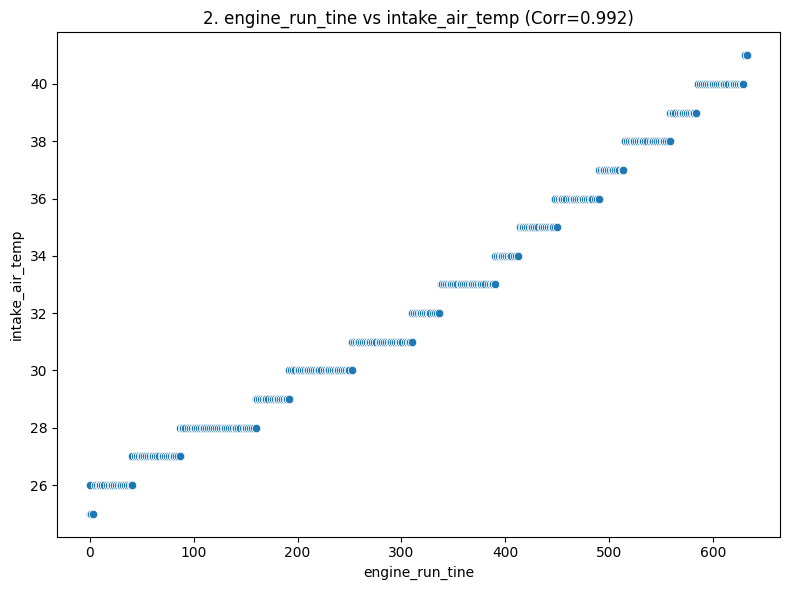

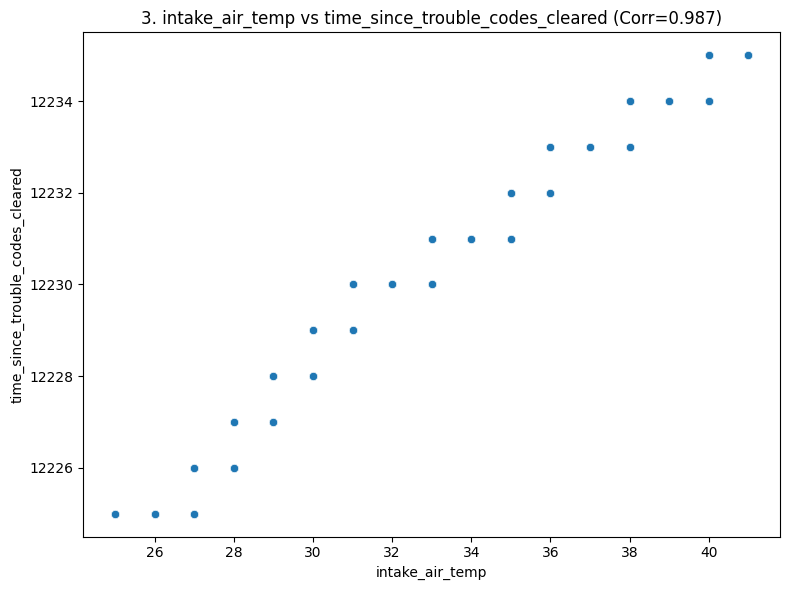

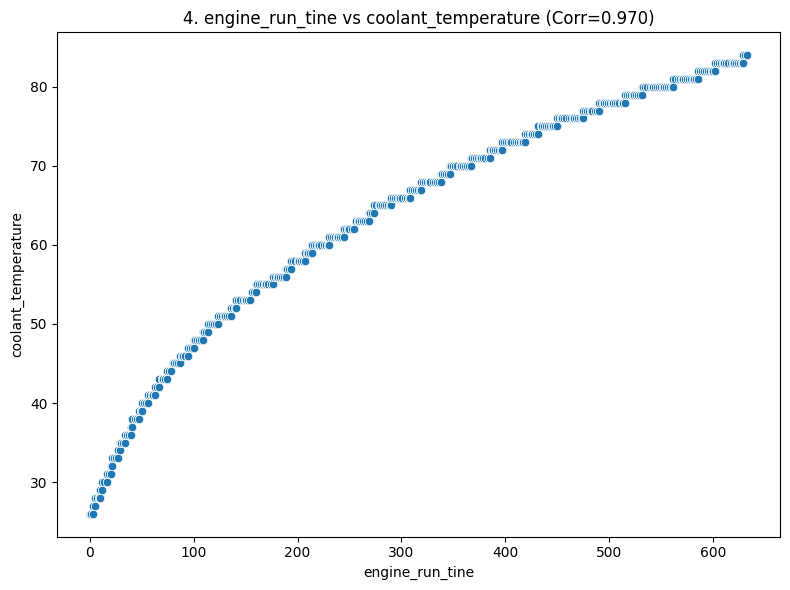

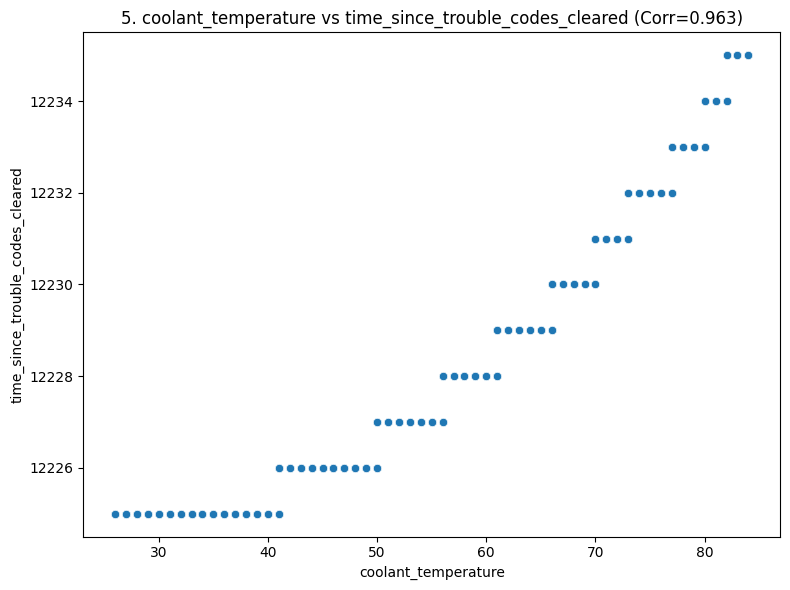

In [13]:
# Top 5 positive correlations
top5_pos = strongest_pos_idle.head(5)
print("\nCreating scatter plots for top 5 positive correlations...")
for i, ((col1, col2), value) in enumerate(top5_pos.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=idle, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/idle30_scatter/positive/scatter_pos{i}_{col1}_{col2}.png", dpi=300)
    plt.show()

Creating scatter plots for top 5 negative correlations...


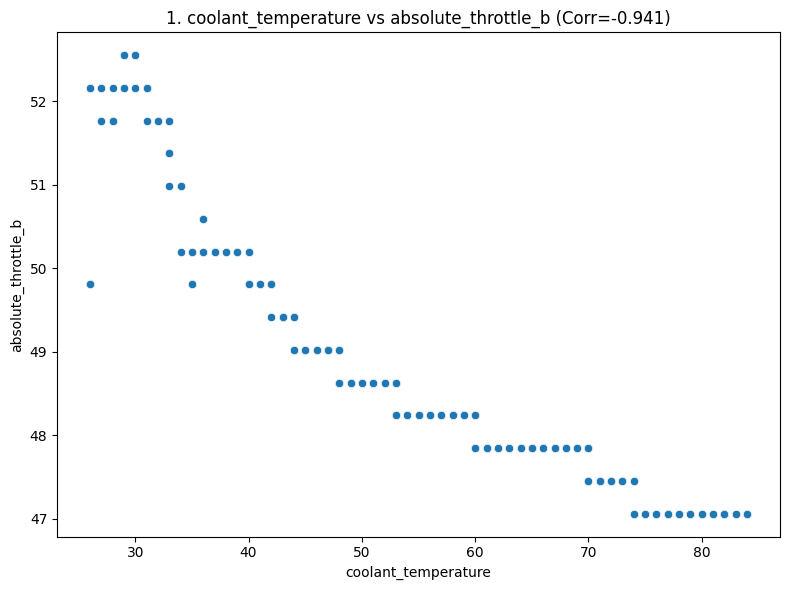

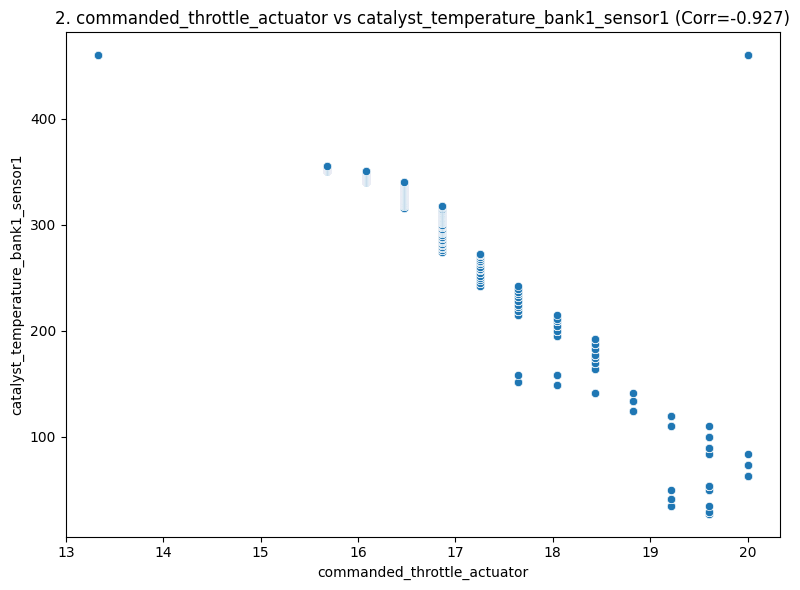

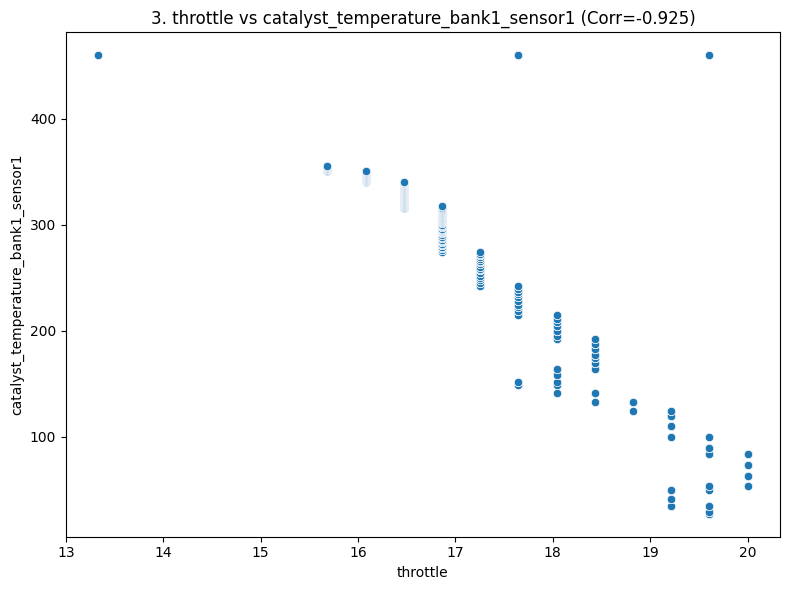

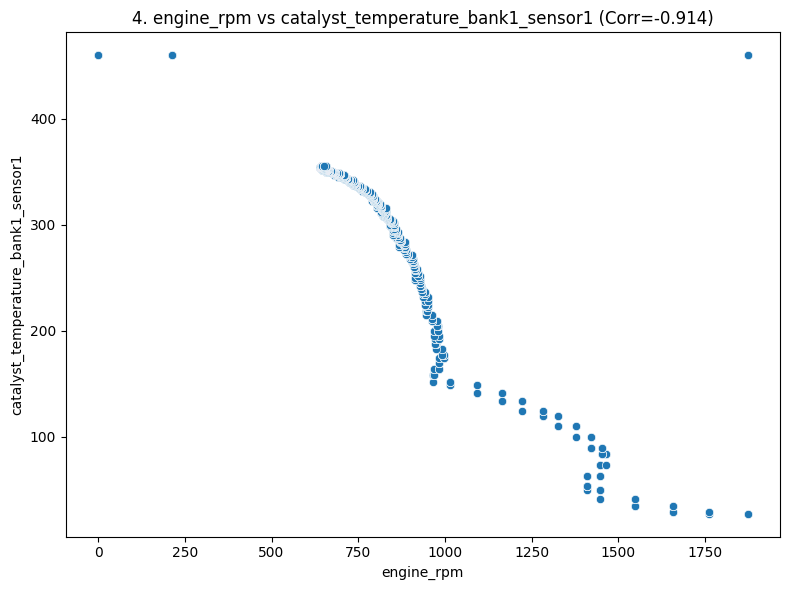

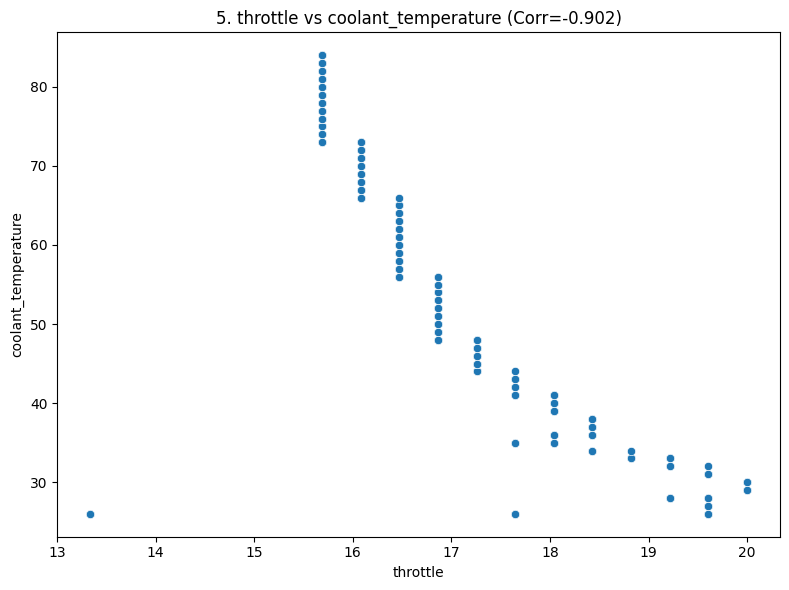

In [14]:
# Top 5 negative correlations
top5_neg = strongest_neg_idle.head(5)
print("Creating scatter plots for top 5 negative correlations...")
for i, ((col1, col2), value) in enumerate(top5_neg.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=idle, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/idle30_scatter/negative/scatter_neg{i}_{col1}_{col2}.png", dpi=300)
    plt.show()